In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
import random

N = 10000
d = 10

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, 
                                         numbers_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward = total_reward + reward

In [6]:
print('Total Reward: {0}'.format(total_reward))

Total Reward: 2598


In [8]:
for i in range(10):
    print('Ad {0} reward: {1}'.format(i+1, numbers_of_rewards_1[i]))

Ad 1 reward: 16
Ad 2 reward: 3
Ad 3 reward: 0
Ad 4 reward: 17
Ad 5 reward: 2493
Ad 6 reward: 0
Ad 7 reward: 4
Ad 8 reward: 55
Ad 9 reward: 9
Ad 10 reward: 1


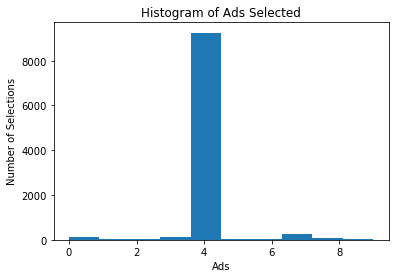

In [9]:
plt.hist(ads_selected);
plt.title('Histogram of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('Number of Selections')